# Ejercicio Práctico con Pandas

## Parte 1: Exploración Básica del DataFrame

In [12]:
# Descarga del .csv a través de un link y crear un DataFrame con ese archivo

import pandas as pd
URL = "https://drive.google.com/uc?export=download&id=1-zKKm5aEEabJS01n4vZhE8iiacnXYWGg"
df = pd.read_csv(URL)
print(df.head(15).to_string(index=False))

Gender    Height     Weight
  Male 73.847017 241.893563
  Male 68.781904 162.310473
  Male 74.110105 212.740856
  Male 71.730978 220.042470
  Male 69.881796 206.349801
  Male 67.253016 152.212156
  Male 68.785081 183.927889
  Male 68.348516 167.971110
  Male 67.018950 175.929440
  Male 63.456494 156.399676
  Male 71.195382 186.604926
  Male 71.640805 213.741169
  Male 64.766329 167.127461
  Male 69.283070 189.446181
  Male 69.243732 186.434168


In [13]:
# Muestra de las primeras y últimas filas del DataFrame

print(f"Las 5 primeras filas del DataFrame son: \n {df.head()}")
print(f"Las 5 últimas filas del DataFrame son: \n {df.tail()}")


Las 5 primeras filas del DataFrame son: 
   Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801
Las 5 últimas filas del DataFrame son: 
       Gender     Height      Weight
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103


In [14]:
# Información general del DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  9998 non-null   float64
 2   Weight  9998 non-null   float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [15]:
# Estadísticas básicas de las columnas numéricas

df.describe()

,Height,Weight
count,9998.000000,9998.000000
mean,66.366788,161.434302
std,3.847510,32.108770
min,54.263133,64.700127
25%,63.505073,135.815966
50%,66.317827,161.197662
75%,69.170292,187.139777
max,78.998742,269.989699


## Parte 2: Limpieza y Preparación de Datos

In [16]:
# Convertir la altura de pulgadas a centímetros

df['Height'] = df['Height'] * 2.54

In [18]:
# Convertir el peso de libras a kilogramos

df['Weight'] = df['Weight'] * 0.453592

In [24]:
# Tratar valores faltantes

print(f"La cantidad de valores faltantes en cada columna es de:\n{df.isnull().sum()}")

La cantidad de valores faltantes en cada columna es de: 
Gender    0
Height    2
Weight    2
dtype: int64


Ya que la cantidad de valores faltantes es muy baja, se eliminan dichos valores nulos:

In [26]:
# Eliminación de valores faltantes

df.dropna(inplace=True)
print(f"Comprobación de que se han eliminado correctamente los valores faltantes:\n{df.isnull().sum()}")

Comprobación de que se han eliminado correctamente los valores faltantes:
Gender    0
Height    0
Weight    0
dtype: int64


## Parte 3: Análisis Exploratorio de Datos

In [27]:
# Agrupar datos por género y calcular el peso medio para cada género

peso_medio_por_genero = df.groupby('Gender')['Weight'].mean()
peso_medio_por_genero

Gender
Female    61.625051
Male      84.827280
Name: Weight, dtype: float64

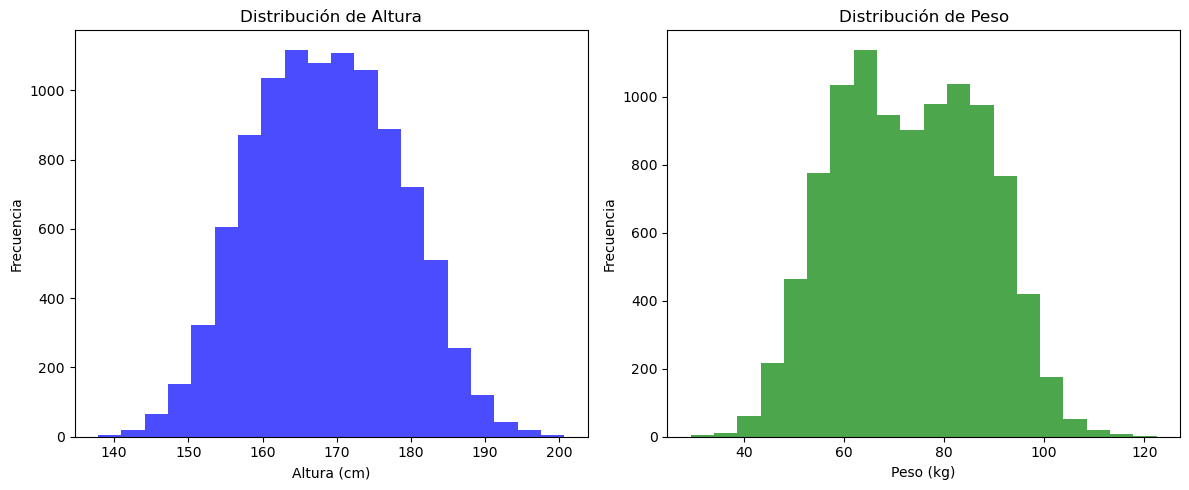

In [30]:
import matplotlib.pyplot as plt

# Crear histogramas de las distribuciones de altura y peso

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Height'], bins=20, color='blue', alpha=0.7)
plt.title('Distribución de Altura')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df['Weight'], bins=20, color='green', alpha=0.7)
plt.title('Distribución de Peso')
plt.xlabel('Peso (kg)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

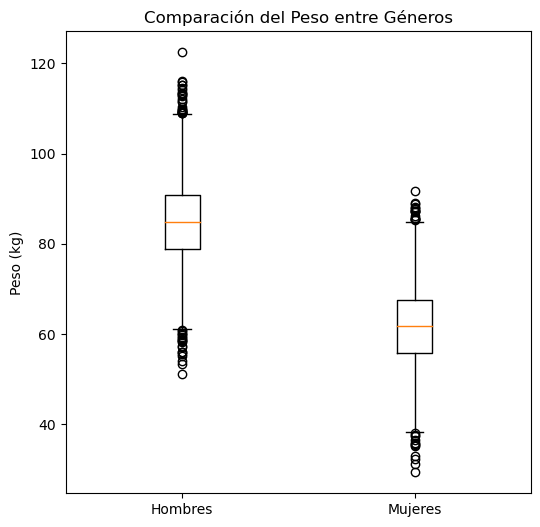

In [31]:
# Crear un diagrama de caja para comparar la distribución del peso entre géneros

plt.figure(figsize=(6, 6))
plt.boxplot([df[df['Gender'] == 'Male']['Weight'], 
             df[df['Gender'] == 'Female']['Weight']], 
            labels=['Hombres', 'Mujeres'])
plt.title('Comparación del Peso entre Géneros')
plt.ylabel('Peso (kg)')
plt.show()

## Parte 4: Operaciones Avanzadas

In [34]:
# Calcular los percentiles del peso para cada género

percentiles_peso = df.groupby('Gender')['Weight'].quantile([0.25, 0.5, 0.75])
print(f"Percentiles del Peso por Género: \n{percentiles_peso}")

Percentiles del Peso por Género: 
Gender      
Female  0.25    55.761923
        0.50    61.741847
        0.75    67.499446
Male    0.25    78.873644
        0.50    84.834327
        0.75    90.880170
Name: Weight, dtype: float64


In [37]:
# Crear una nueva columna que clasifique a los individuos según su IMC 
df['IMC'] = df['Weight'] / ((df['Height'] / 100) ** 2)
df['Clasificación_IMC'] = pd.cut(df['IMC'], bins=[0, 18.5, 24.9, 29.9, float('inf')], labels=['Bajo Peso', 'Peso Normal', 'Sobrepeso', 'Obesidad'])
df

,Gender,Height,Weight,IMC,Clasificación_IMC
0,Male,187.571423,109.720985,31.185761,Obesidad
1,Male,174.706036,73.622732,24.121044,Peso Normal
2,Male,188.239668,96.497550,27.232906,Sobrepeso
3,Male,182.196685,99.809504,30.067059,Obesidad
4,Male,177.499761,93.598619,29.708033,Sobrepeso
...,...,...,...,...,...
9995,Female,168.078536,62.041159,21.961166,Peso Normal
9996,Female,170.350573,77.504315,26.707835,Sobrepeso
9997,Female,162.224700,58.275377,22.143748,Peso Normal
9998,Female,175.346978,74.322166,24.172512,Peso Normal


## Parte 5: Exportar resultados


In [38]:
df.to_csv("resultados_analisis_peso_altura.csv", index=False)